In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
path = '../data/traffic_sp/'

files = os.listdir(path)

2023-04-24 00:07:43.705214: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Define helper funcs to clean and concat data

In [2]:
def delete_columns(df, column_list):
    df.drop(column_list, axis=1, inplace=True)
    return df

In [3]:
def concat_dfs(df_list):
    df = pd.concat(df_list, axis=0)
    return df

In [4]:
def rename_columns(df, column_list):
    df.columns = column_list
    return df

### Concatenating and Renaming (2010-2011)

In [5]:
df2010 = pd.read_csv(path + 'lentidaotrechos2010.csv', sep=';', encoding='ISO-8859-1')
df2011 = pd.read_csv(path + 'lentidaotrechos2011.csv', sep=';', encoding='ISO-8859-1')
df_list = [df2010, df2011]

In [6]:
df_2010_2011 = concat_dfs(df_list)
df_2010_2011.head()

,Data,Corredor,Sentido,Pista,Trecho,Valor,Região
0,2/1/10 18:00,Marginal Tietê,A.Senna/Castelo Branco,A,De BANDEIRAS até COROA,1090,LESTE
1,2/1/10 18:00,Vale/P.Maia/Tirad/S.Dumont,Santana/Aeroporto,NaN,De BANDEIRAS Término da Pte até BANDEIRAS Tér...,410,CENTRO
2,2/1/10 18:30,"Vitor Manzini, Av",Centro/Bairro,NaN,De SOCORRO Inicio Pte até WASHINGTON LUIS,550,SUL
3,2/1/10 18:30,Marginal Tietê,A.Senna/Castelo Branco,A,De BANDEIRAS até CRUZEIRO DO SUL,500,LESTE
4,2/1/10 19:00,Marginal Tietê,Castelo/A.Senna,A,De CASA VERDE até LIMAO,1290,LESTE


In [7]:
df_2010_2011 = rename_columns(df_2010_2011, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2010_2011.head()


,data,corredor,sentido,pista,trecho,valor,regiao
0,2/1/10 18:00,Marginal Tietê,A.Senna/Castelo Branco,A,De BANDEIRAS até COROA,1090,LESTE
1,2/1/10 18:00,Vale/P.Maia/Tirad/S.Dumont,Santana/Aeroporto,NaN,De BANDEIRAS Término da Pte até BANDEIRAS Tér...,410,CENTRO
2,2/1/10 18:30,"Vitor Manzini, Av",Centro/Bairro,NaN,De SOCORRO Inicio Pte até WASHINGTON LUIS,550,SUL
3,2/1/10 18:30,Marginal Tietê,A.Senna/Castelo Branco,A,De BANDEIRAS até CRUZEIRO DO SUL,500,LESTE
4,2/1/10 19:00,Marginal Tietê,Castelo/A.Senna,A,De CASA VERDE até LIMAO,1290,LESTE


### Concatenating and Renaming (2012 - 2013)

In [8]:
df2012 = pd.read_csv(path + 'lentidaotrechos2012.csv', sep=';', encoding='ISO-8859-1')
df2013 = pd.read_csv(path + 'lentidaotrechos2013.csv', sep=';', encoding='ISO-8859-1')
df_list2 = [df2012, df2013]

In [9]:
df_2012_2013 = concat_dfs(df_list2)
df_2012_2013.head()

,data,corredor,sentido,expressa,descricao,tamanho,nome_regiao
0,01/01/2012 21:30,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
1,01/01/2012 21:30,"Pedro Alvares Cabral, Av",Vila Mariana/Pinheiros,NaN,De ARMANDO DE SALES OLIVEIRA até ABILIO SOARES,460,SUL
2,01/01/2012 22:00,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
3,01/01/2012 22:30,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
4,01/01/2012 23:00,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO


In [10]:
df_2012_2013 = rename_columns(df_2012_2013, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2012_2013.head()

,data,corredor,sentido,pista,trecho,valor,regiao
0,01/01/2012 21:30,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
1,01/01/2012 21:30,"Pedro Alvares Cabral, Av",Vila Mariana/Pinheiros,NaN,De ARMANDO DE SALES OLIVEIRA até ABILIO SOARES,460,SUL
2,01/01/2012 22:00,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
3,01/01/2012 22:30,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
4,01/01/2012 23:00,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO


###  Renaming (2014)

In [11]:
df_2014 = pd.read_csv(path + 'lentidaotrechos2014.csv', sep=';', encoding='ISO-8859-1')
df_2014.head()

,data/hora,corredor,sentido,expressa,Trecho,tamanho (metros),nome_regiao
0,02/01/2014 07:00,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De JABAQUARA Vd até ALIOMAR BALEEIRO Término,1100,SUL
1,02/01/2014 07:00,"Interlagos, Av I",Bairro/Centro,NaN,De JURUBATUBA Término até JOAO PAULO DA SILVA,910,SUL
2,02/01/2014 07:30,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL
3,02/01/2014 08:00,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL
4,02/01/2014 08:30,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL


In [12]:
df_2014 = rename_columns(df_2014, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2014.head()

,data,corredor,sentido,pista,trecho,valor,regiao
0,02/01/2014 07:00,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De JABAQUARA Vd até ALIOMAR BALEEIRO Término,1100,SUL
1,02/01/2014 07:00,"Interlagos, Av I",Bairro/Centro,NaN,De JURUBATUBA Término até JOAO PAULO DA SILVA,910,SUL
2,02/01/2014 07:30,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL
3,02/01/2014 08:00,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL
4,02/01/2014 08:30,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL


### Concatenating and Renaming (2015 - 2016)

In [13]:
df_2015 = pd.read_csv(path + 'lentidaotrechos2015.csv', sep=';', encoding='ISO-8859-1')
df_2016 = pd.read_csv(path + 'lentidaotrechos2016.csv', sep=';', encoding='ISO-8859-1')
df_list3 = [df_2015, df_2016]

In [14]:
df_2015_2016 = concat_dfs(df_list3)
df_2015_2016.head()

,data/hora,corredor,sentido,expressa,Trechos,tamanho,nome_regiao
0,04/01/2015 14:30,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE
1,04/01/2015 14:30,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,De Emboque Túnel Jânio Quadros até 290 m depo...,260,SUL
2,04/01/2015 15:00,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE
3,04/01/2015 15:00,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,De Emboque Túnel Jânio Quadros até 290 m depo...,260,SUL
4,04/01/2015 15:30,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE


In [15]:
df_2015_2016 = rename_columns(df_2015_2016, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2015_2016.head()

,data,corredor,sentido,pista,trecho,valor,regiao
0,04/01/2015 14:30,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE
1,04/01/2015 14:30,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,De Emboque Túnel Jânio Quadros até 290 m depo...,260,SUL
2,04/01/2015 15:00,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE
3,04/01/2015 15:00,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,De Emboque Túnel Jânio Quadros até 290 m depo...,260,SUL
4,04/01/2015 15:30,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE


###  Renaming 2017 

In [16]:
df_2017 = pd.read_csv(path + 'lentidaotrechos2017.csv', sep=';', encoding='ISO-8859-1')

In [17]:
df_2107 = rename_columns(df_2017, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2107.head()

,data,corredor,sentido,pista,trecho,valor,regiao
0,02/01/2017 06:30,"Nove de Julho, Av",Centro/Bairro,NaN,De BARATA RIBEIRO até BANDEIRA,1370,CENTRO
1,02/01/2017 06:30,Cidade Jardim / Europa / Colômbia,Bairro/Centro,NaN,De CIDADE JARDIM Término até CIDADE JARDIM In...,300,OESTE
2,02/01/2017 07:00,"Nove de Julho, Av",Centro/Bairro,NaN,De BARATA RIBEIRO até BANDEIRA,1370,CENTRO
3,02/01/2017 07:00,Cidade Jardim / Europa / Colômbia,Bairro/Centro,NaN,De MARIO FERRAZ até CIDADE JARDIM Término,596,OESTE
4,02/01/2017 07:30,"Nove de Julho, Av",Centro/Bairro,NaN,De BARATA RIBEIRO até BANDEIRA,1370,CENTRO


### Concatenating and Renaming (2018 - 2022)

In [18]:
df2018 = pd.read_csv(path + 'lentidaotrechos2018.csv', sep=';', encoding='ISO-8859-1')
df2019 = pd.read_csv(path + 'lentidaotrechos2019.csv', sep=';', encoding='ISO-8859-1')
df2020 = pd.read_csv(path + 'lentidaotrechos2020.csv', sep=';', encoding='ISO-8859-1')
df2021 = pd.read_csv(path + 'lentidaotrechos2021.csv', sep=';', encoding='ISO-8859-1')
df2022 = pd.read_csv(path + 'lentidaotrechos2022.csv', sep=';', encoding='ISO-8859-1')
df_list4 = [df2018, df2019, df2020, df2021, df2022]

In [19]:
df_2018_2022 = concat_dfs(df_list4)
df_2018_2022.head()

,data,corredor,sentido,expressa,descricao,tamanho,nome_regiao
0,1/1/18 18:30,Marginal Tietê,A.Senna/Castelo Branco,E,De CRUZEIRO DO SUL até COROA,780,LESTE
1,1/1/18 19:00,Marginal Tietê,A.Senna/Castelo Branco,E,De CRUZEIRO DO SUL até COROA,780,LESTE
2,2/1/18 11:00,Vinte Três/R Berta/M Guimarães,Santana/Aeroporto,NaN,De JACEGUAI até BANDEIRA,832,CENTRO
3,2/1/18 12:00,Marginal Tietê,A.Senna/Castelo Branco,E,De BANDEIRAS até 690 m depois de ARCO DA SABESP,2110,LESTE
4,2/1/18 12:30,Marginal Tietê,A.Senna/Castelo Branco,E,De BANDEIRAS até 690 m depois de ARCO DA SABESP,2110,LESTE


In [20]:
df_2018_2022 = rename_columns(df_2018_2022, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2018_2022.head()

,data,corredor,sentido,pista,trecho,valor,regiao
0,1/1/18 18:30,Marginal Tietê,A.Senna/Castelo Branco,E,De CRUZEIRO DO SUL até COROA,780,LESTE
1,1/1/18 19:00,Marginal Tietê,A.Senna/Castelo Branco,E,De CRUZEIRO DO SUL até COROA,780,LESTE
2,2/1/18 11:00,Vinte Três/R Berta/M Guimarães,Santana/Aeroporto,NaN,De JACEGUAI até BANDEIRA,832,CENTRO
3,2/1/18 12:00,Marginal Tietê,A.Senna/Castelo Branco,E,De BANDEIRAS até 690 m depois de ARCO DA SABESP,2110,LESTE
4,2/1/18 12:30,Marginal Tietê,A.Senna/Castelo Branco,E,De BANDEIRAS até 690 m depois de ARCO DA SABESP,2110,LESTE


### Concat all dfs

In [21]:
df_list_all = [df_2010_2011, df_2012_2013, df_2014, df_2015_2016, df_2017, df_2018_2022]
df_concat = concat_dfs(df_list_all)
len(df_concat)

3388136

In [22]:
df_concat.head()

,data,corredor,sentido,pista,trecho,valor,regiao
0,2/1/10 18:00,Marginal Tietê,A.Senna/Castelo Branco,A,De BANDEIRAS até COROA,1090,LESTE
1,2/1/10 18:00,Vale/P.Maia/Tirad/S.Dumont,Santana/Aeroporto,NaN,De BANDEIRAS Término da Pte até BANDEIRAS Tér...,410,CENTRO
2,2/1/10 18:30,"Vitor Manzini, Av",Centro/Bairro,NaN,De SOCORRO Inicio Pte até WASHINGTON LUIS,550,SUL
3,2/1/10 18:30,Marginal Tietê,A.Senna/Castelo Branco,A,De BANDEIRAS até CRUZEIRO DO SUL,500,LESTE
4,2/1/10 19:00,Marginal Tietê,Castelo/A.Senna,A,De CASA VERDE até LIMAO,1290,LESTE


### Analysis of Hours of Congestion

In [23]:
df_concat['Horas'] = pd.to_datetime(df_concat['data']).dt.time
df_horarios = df_concat.groupby(['Horas', 'regiao']).sum().reset_index()
df_horarios

/var/folders/0k/7k3mpwvj48g0lfkz903cbmpm0000gn/T/ipykernel_9551/789033558.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_concat['Horas'] = pd.to_datetime(df_concat['data']).dt.time
/var/folders/0k/7k3mpwvj48g0lfkz903cbmpm0000gn/T/ipykernel_9551/789033558.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_horarios = df_concat.groupby(['Horas', 'regiao']).sum().reset_index()


,Horas,regiao,valor
0,00:00:00,CENTRO,1145898
1,00:00:00,LESTE,1347168
2,00:00:00,NORTE,53424
3,00:00:00,OESTE,1067432
4,00:00:00,SUL,540182
...,...,...,...
235,23:30:00,CENTRO,1439300
236,23:30:00,LESTE,1729647
237,23:30:00,NORTE,64498
238,23:30:00,OESTE,1414934


In [24]:
#Gráfico para visualizar horários com mais transito por região
fig = px.line(df_horarios, x="Horas", y='valor',color = 'regiao')
fig.show()

In [25]:
#Criando uma tabela da distribuição de transito em porcentagem por zona de SP
df_porcentagem_do_total = pd.DataFrame()
for região in df_concat['regiao'].unique():
    regiões = df_concat[df_concat['regiao']== região]
    df_horas = regiões.groupby('Horas').sum().reset_index()
    df_horas[f'% do congestionamento total {região}'] = df_horas['valor']/df_horas['valor'].sum() *100
    df_porcentagem_do_total[f'% do congestionamento total {região}'] = df_horas[f'% do congestionamento total {região}']
     
df_porcentagem_do_total['Horas'] = df_horas['Horas']
df_porcentagem_do_total = df_porcentagem_do_total[['Horas', '% do congestionamento total CENTRO', '% do congestionamento total OESTE', '% do congestionamento total LESTE','% do congestionamento total SUL','% do congestionamento total NORTE']]
df_porcentagem_do_total

/var/folders/0k/7k3mpwvj48g0lfkz903cbmpm0000gn/T/ipykernel_9551/2659892626.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/0k/7k3mpwvj48g0lfkz903cbmpm0000gn/T/ipykernel_9551/2659892626.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/0k/7k3mpwvj48g0lfkz903cbmpm0000gn/T/ipykernel_9551/2659892626.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/0k/7k3mpwvj48g0lfkz903cbmpm000

,Horas,% do congestionamento total CENTRO,% do congestionamento total OESTE,% do congestionamento total LESTE,% do congestionamento total SUL,% do congestionamento total NORTE
0,00:00:00,0.081217,0.085963,0.111413,0.064374,0.037014
1,00:30:00,0.061931,0.071398,0.086297,0.057959,0.028922
2,01:00:00,0.054816,0.059596,0.075640,0.046539,0.026262
3,01:30:00,0.039976,0.049434,0.059499,0.037489,0.021473
4,02:00:00,0.035609,0.038770,0.053474,0.031423,0.017780
5,02:30:00,0.027406,0.032935,0.048540,0.027561,0.017780
6,03:00:00,0.024293,0.029591,0.042819,0.026458,0.016173
7,03:30:00,0.022467,0.026965,0.038491,0.022046,0.016173
8,04:00:00,0.021813,0.025160,0.035119,0.020947,0.012372
9,04:30:00,0.021083,0.022822,0.035187,0.018903,0.012116


### Cleaning New Dataframe


In [26]:
df = delete_columns(df_concat, ['corredor', 'sentido', 'pista', 'trecho'])

In [27]:
# remove time from date column and sum all values for each day by region
df['data'] = pd.to_datetime(df['data']).dt.date
df = df.groupby(['data', 'regiao']).sum().reset_index()
df.head()

/var/folders/0k/7k3mpwvj48g0lfkz903cbmpm0000gn/T/ipykernel_9551/3349275632.py:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

/var/folders/0k/7k3mpwvj48g0lfkz903cbmpm0000gn/T/ipykernel_9551/3349275632.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,data,regiao,valor
0,2010-01-02,CENTRO,369829
1,2010-01-02,LESTE,423644
2,2010-01-02,NORTE,87830
3,2010-01-02,OESTE,340640
4,2010-01-02,SUL,294580


In [28]:
#turn valor column into km
df['valor'] = df['valor']/1000
df.head()

,data,regiao,valor
0,2010-01-02,CENTRO,369.829
1,2010-01-02,LESTE,423.644
2,2010-01-02,NORTE,87.830
3,2010-01-02,OESTE,340.640
4,2010-01-02,SUL,294.580


### Splitting weather data from 2010 onward and joining with traffic data

In [31]:
df_weather = pd.read_csv('../data/openweather_data.csv')
df_weather.head()


,dt,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
0,2001-12-31,05:22:45,18:56:22,21.84,22.09,1010,77,17.63,40,10000.0,0.0,0,"{'id': 802, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,802
1,2002-01-01,05:23:23,18:56:40,20.75,20.94,1010,79,16.98,40,10000.0,2.1,290,"{'id': 802, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,802
2,2002-01-02,05:24:02,18:56:56,21.54,21.34,1011,61,13.71,20,10000.0,0.0,0,"{'id': 801, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,801
3,2002-01-03,05:24:41,18:57:11,21.30,21.44,1013,75,16.69,75,9000.0,2.6,130,"{'id': 721, 'main': 'Haze', 'description': 'ha...",NaN,NaN,NaN,721
4,2002-01-04,05:25:21,18:57:24,20.59,20.69,1015,76,16.21,20,7000.0,5.1,150,"{'id': 721, 'main': 'Haze', 'description': 'ha...",NaN,NaN,NaN,721


In [32]:
# filter date to start in 2010
df_weather = df_weather[df_weather['dt'] >= '2010-01-01']
df_weather.head()

,dt,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
2923,2010-01-01,05:23:21,18:56:39,19.90,20.37,1015,93,18.73,100,10000.0,1.0,310,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2924,2010-01-02,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2925,2010-01-03,05:24:39,18:57:10,23.20,23.77,1018,84,20.35,75,10000.0,4.1,150,"{'id': 701, 'main': 'Mist', 'description': 'mi...",NaN,NaN,NaN,701
2926,2010-01-04,05:25:19,18:57:23,22.33,22.81,1017,84,19.50,75,10000.0,1.0,40,"{'id': 803, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,803
2927,2010-01-05,05:25:59,18:57:36,21.34,21.93,1015,92,19.99,100,2000.0,1.5,360,"{'id': 521, 'main': 'Rain', 'description': 'sh...",NaN,NaN,NaN,521


In [33]:
df_weather.reset_index(drop=True, inplace=True)
df_weather.head()

,dt,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
0,2010-01-01,05:23:21,18:56:39,19.90,20.37,1015,93,18.73,100,10000.0,1.0,310,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
1,2010-01-02,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2,2010-01-03,05:24:39,18:57:10,23.20,23.77,1018,84,20.35,75,10000.0,4.1,150,"{'id': 701, 'main': 'Mist', 'description': 'mi...",NaN,NaN,NaN,701
3,2010-01-04,05:25:19,18:57:23,22.33,22.81,1017,84,19.50,75,10000.0,1.0,40,"{'id': 803, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,803
4,2010-01-05,05:25:59,18:57:36,21.34,21.93,1015,92,19.99,100,2000.0,1.5,360,"{'id': 521, 'main': 'Rain', 'description': 'sh...",NaN,NaN,NaN,521


In [34]:
#turn date column to datetime
df_weather['dt'] = pd.to_datetime(df_weather['dt'])
df_weather.head()

,dt,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
0,2010-01-01,05:23:21,18:56:39,19.90,20.37,1015,93,18.73,100,10000.0,1.0,310,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
1,2010-01-02,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2,2010-01-03,05:24:39,18:57:10,23.20,23.77,1018,84,20.35,75,10000.0,4.1,150,"{'id': 701, 'main': 'Mist', 'description': 'mi...",NaN,NaN,NaN,701
3,2010-01-04,05:25:19,18:57:23,22.33,22.81,1017,84,19.50,75,10000.0,1.0,40,"{'id': 803, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,803
4,2010-01-05,05:25:59,18:57:36,21.34,21.93,1015,92,19.99,100,2000.0,1.5,360,"{'id': 521, 'main': 'Rain', 'description': 'sh...",NaN,NaN,NaN,521


In [35]:
#rename dt column to date
df_weather = df_weather.rename(columns={'dt': 'data'})
df_weather.head()

,data,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
0,2010-01-01,05:23:21,18:56:39,19.90,20.37,1015,93,18.73,100,10000.0,1.0,310,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
1,2010-01-02,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2,2010-01-03,05:24:39,18:57:10,23.20,23.77,1018,84,20.35,75,10000.0,4.1,150,"{'id': 701, 'main': 'Mist', 'description': 'mi...",NaN,NaN,NaN,701
3,2010-01-04,05:25:19,18:57:23,22.33,22.81,1017,84,19.50,75,10000.0,1.0,40,"{'id': 803, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,803
4,2010-01-05,05:25:59,18:57:36,21.34,21.93,1015,92,19.99,100,2000.0,1.5,360,"{'id': 521, 'main': 'Rain', 'description': 'sh...",NaN,NaN,NaN,521


In [36]:
#check date column datatype to see if it is datetime
df_weather.dtypes

data                       datetime64[ns]
sunrise                            object
sunset                             object
temp ºC                           float64
feels_like ºC                     float64
pressure                            int64
humidity %                          int64
atmospheric temperature           float64
clouds %                            int64
visibility                        float64
wind_speed m/s                    float64
wind_deg                            int64
weather                            object
rain_precipitation                 object
wind_gust                         float64
uvi                               float64
weather_id                          int64
dtype: object

In [37]:
#turn data column in df to datetime
df['data'] = pd.to_datetime(df['data'])
df.dtypes

data      datetime64[ns]
regiao            object
valor            float64
dtype: object

In [38]:
#merge df and df_weather
df = pd.merge(df, df_weather, on='data')
df.head()

,data,regiao,valor,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
0,2010-01-02,CENTRO,369.829,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
1,2010-01-02,LESTE,423.644,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2,2010-01-02,NORTE,87.830,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
3,2010-01-02,OESTE,340.640,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
4,2010-01-02,SUL,294.580,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500


In [39]:
def extract_number(s):
    rain_mm_pattern = r'\d+\.\d+'
    if pd.isna(s):
        return np.nan
    else:
        matches = re.findall(rain_mm_pattern, s)
        return float(matches[0]) if matches else np.nan

In [40]:
#extract numbers from rain column
import re
df['rain_mm'] = df['rain_precipitation'].apply(extract_number)
df.head()

,data,regiao,valor,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id,rain_mm
0,2010-01-02,CENTRO,369.829,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,NaN
1,2010-01-02,LESTE,423.644,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,NaN
2,2010-01-02,NORTE,87.830,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,NaN
3,2010-01-02,OESTE,340.640,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,NaN
4,2010-01-02,SUL,294.580,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,NaN


In [41]:
#turn nan in rain_mm column to 0
df['rain_mm'] = df['rain_mm'].fillna(0)
df.head()


,data,regiao,valor,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id,rain_mm
0,2010-01-02,CENTRO,369.829,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,0.0
1,2010-01-02,LESTE,423.644,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,0.0
2,2010-01-02,NORTE,87.830,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,0.0
3,2010-01-02,OESTE,340.640,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,0.0
4,2010-01-02,SUL,294.580,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,0.0


In [42]:
#drop weather, rain_precipitation, sunrise, sunset, wind_deg, wind_gust
df = df.drop(['weather', 'rain_precipitation', 'sunrise', 'sunset', 'wind_deg', 'wind_gust', 'uvi', 'weather_id'], axis=1)
df.head()

,data,regiao,valor,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,rain_mm
0,2010-01-02,CENTRO,369.829,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
1,2010-01-02,LESTE,423.644,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
2,2010-01-02,NORTE,87.830,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
3,2010-01-02,OESTE,340.640,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
4,2010-01-02,SUL,294.580,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0


### Preparing the df for training

In [43]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=7)

In [44]:
#set date as index
df = df.set_index('data')
df.head()

,regiao,valor,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,rain_mm
data,,,,,,,,,,,
2010-01-02,CENTRO,369.829,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
2010-01-02,LESTE,423.644,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
2010-01-02,NORTE,87.830,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
2010-01-02,OESTE,340.640,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
2010-01-02,SUL,294.580,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0


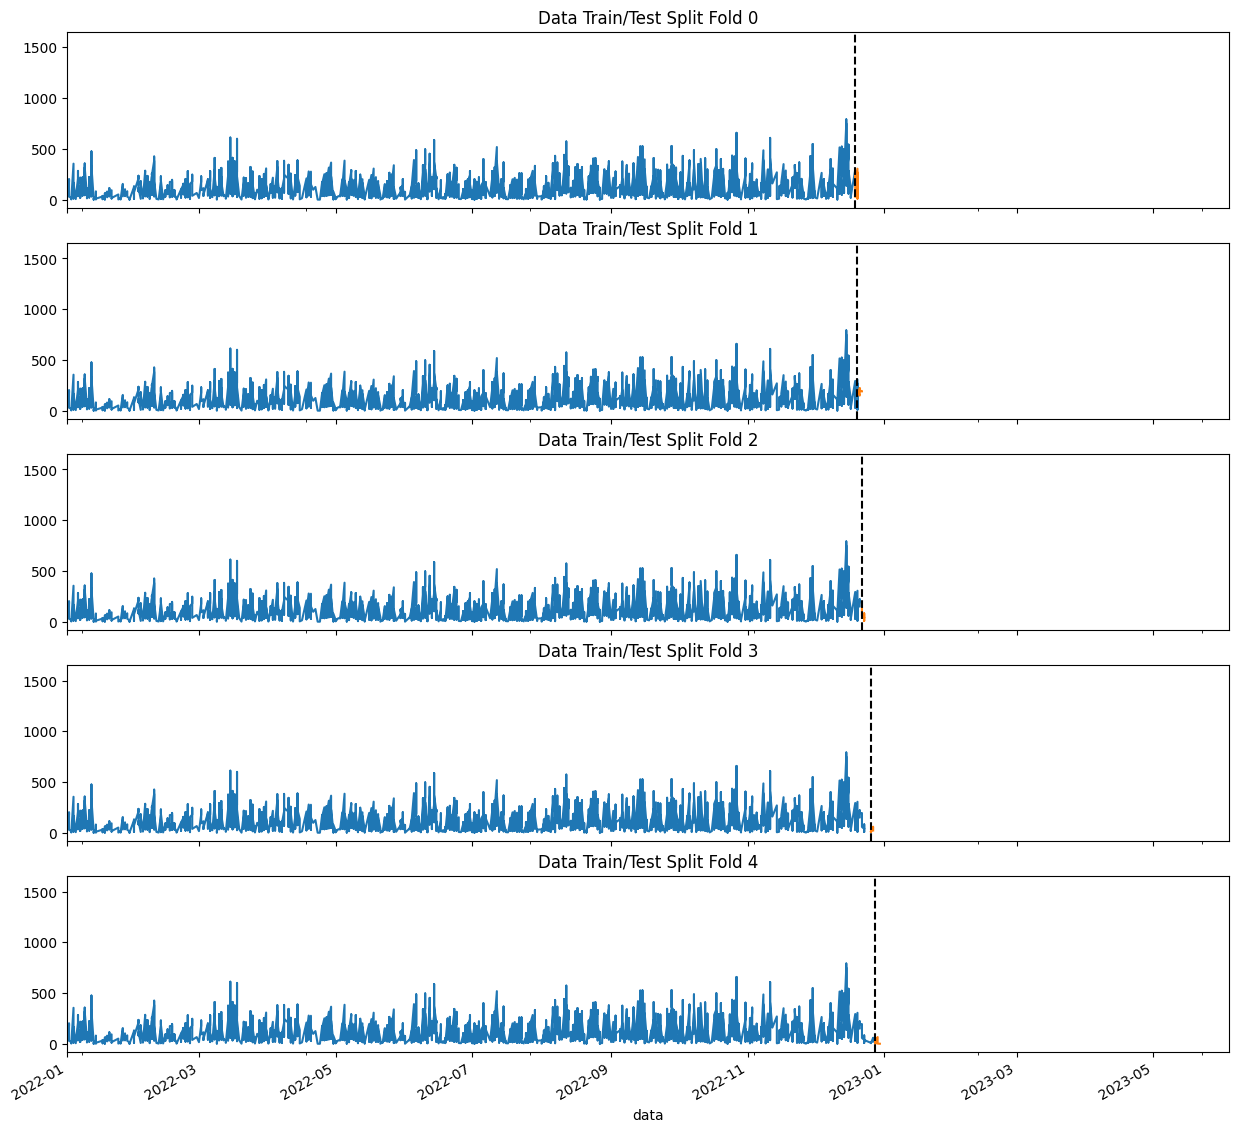

In [45]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['valor'].plot(ax=axs[fold],
                       x='year', y='valor',
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['valor'].plot(ax=axs[fold],
                      x='year', y='valor',
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.xlim('2022-01-01', '2023-06-04')
#plt.suptitle('Cross Validation Folds', size=24, weight='bold')
#plt.tight_layout()
plt.show()

In [46]:
#one hot encode region column keeping original names
df = pd.get_dummies(df, columns=['regiao'], prefix='', prefix_sep='')
df.head()


,valor,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,rain_mm,CENTRO,LESTE,NORTE,OESTE,SUL
data,,,,,,,,,,,,,,,
2010-01-02,369.829,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0,1,0,0,0,0
2010-01-02,423.644,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0,0,1,0,0,0
2010-01-02,87.830,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0,0,0,1,0,0
2010-01-02,340.640,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0,0,0,0,1,0
2010-01-02,294.580,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0,0,0,0,0,1


/var/folders/0k/7k3mpwvj48g0lfkz903cbmpm0000gn/T/ipykernel_9551/2884628914.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




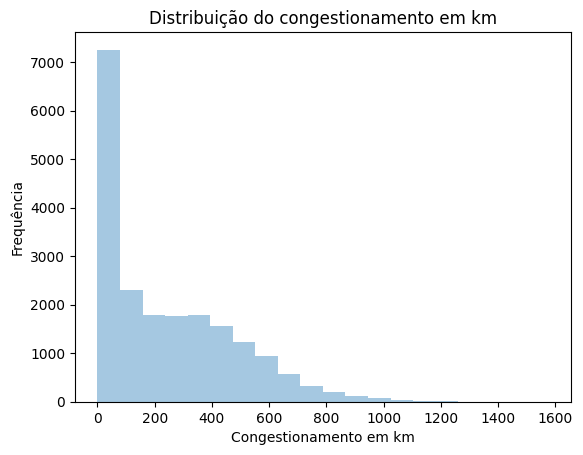

In [47]:
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import re
sns.distplot(df['valor'], bins=20, kde=False)
plt.title('Distribuição do congestionamento em km')
plt.xlabel('Congestionamento em km')
plt.ylabel('Frequência')
plt.show()
df.drop(['visibility'], axis=1, inplace=True)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['temp ºC', 'feels_like ºC', 'pressure', 'humidity %', 'atmospheric temperature', 'clouds %', 'wind_speed m/s','rain_mm']] = scaler.fit_transform(df[['temp ºC', 'feels_like ºC', 'pressure', 'humidity %', 'atmospheric temperature', 'clouds %','wind_speed m/s','rain_mm']])
df[['valor']] = scaler.fit_transform(df[['valor']])

In [50]:
def create_sequences(data, n_steps):
    X = []
    y = []
    for i in range(len(data)-n_steps):
        X.append(data.iloc[i:i+n_steps, :].values)
        y.append(data.iloc[i+n_steps, 0])
    return np.array(X), np.array(y), np.array


In [51]:

# create sequences
n_steps = 7
X, y, df = create_sequences(df, n_steps)
X.shape, y.shape

((20002, 7, 14), (20002,))

In [52]:
# split into train and test sets
n_train = 365*5
X_train, X_test, y_train, y_test = X[:n_train], X[n_train:], y[:n_train], y[n_train:]
#create validation set
X_train, X_val, y_train, y_val = X_train[:-7], X_train[-7:], y_train[:-7], y_train[-7:]

Epoch 1/100
57/57 [==============================] - 5s 23ms/step - loss: 0.8625 - val_loss: 0.4816
Epoch 2/100
57/57 [==============================] - 1s 14ms/step - loss: 0.8369 - val_loss: 0.4697
Epoch 3/100
57/57 [==============================] - 1s 15ms/step - loss: 0.8258 - val_loss: 0.4527
Epoch 4/100
57/57 [==============================] - 1s 15ms/step - loss: 0.7970 - val_loss: 0.4180
Epoch 5/100
57/57 [==============================] - 1s 15ms/step - loss: 0.7267 - val_loss: 0.3933
Epoch 6/100
57/57 [==============================] - 1s 16ms/step - loss: 0.6631 - val_loss: 0.4238
Epoch 7/100
57/57 [==============================] - 1s 15ms/step - loss: 0.5893 - val_loss: 0.5086
Epoch 8/100
57/57 [==============================] - 1s 16ms/step - loss: 0.5833 - val_loss: 0.4808
Epoch 9/100
57/57 [==============================] - 1s 15ms/step - loss: 0.5301 - val_loss: 0.4938
Epoch 10/100
57/57 [==============================] - 1s 14ms/step - loss: 0.5247 - val_loss: 0.4888

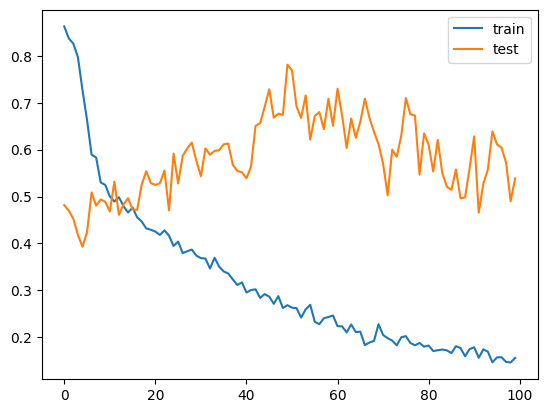

In [53]:
# define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import re

model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_steps, 14)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)

# plot learning curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [54]:
# make a prediction
yhat = model.predict(X_test, verbose=0)

In [55]:
#denormalize predictions
yhat = scaler.inverse_transform(yhat)

In [56]:
y_train_denorm = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_denorm = scaler.inverse_transform(y_test.reshape(-1, 1))

In [57]:
#get train and test rmse
from math import sqrt
from sklearn.metrics import mean_squared_error
yhat_train = model.predict(X_train, verbose=0)
yhat_train = scaler.inverse_transform(yhat_train)
rmse = sqrt(mean_squared_error(y_train_denorm, yhat_train))
print('Train RMSE: %.3f' % rmse)

rmse_test = sqrt(mean_squared_error(y_test_denorm, yhat))
print('Test RMSE: %.3f' % rmse_test)

Train RMSE: 78.587
Test RMSE: 195.117


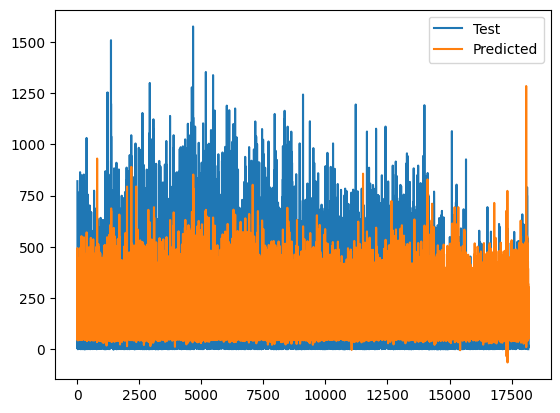

In [58]:
# plot predictions
plt.plot(y_test_denorm, label='Test')
plt.plot(yhat, label='Predicted')
plt.legend() 
plt.show()


Epoch 1/100
57/57 [==============================] - 5s 23ms/step - loss: 0.8553 - val_loss: 0.4386
Epoch 2/100
57/57 [==============================] - 1s 13ms/step - loss: 0.8422 - val_loss: 0.4362
Epoch 3/100
57/57 [==============================] - 1s 11ms/step - loss: 0.8207 - val_loss: 0.4009
Epoch 4/100
57/57 [==============================] - 1s 10ms/step - loss: 0.8031 - val_loss: 0.3893
Epoch 5/100
57/57 [==============================] - 1s 11ms/step - loss: 0.7805 - val_loss: 0.4470
Epoch 6/100
57/57 [==============================] - 1s 21ms/step - loss: 0.7513 - val_loss: 0.4194
Epoch 7/100
57/57 [==============================] - 1s 21ms/step - loss: 0.7238 - val_loss: 0.4299
Epoch 8/100
57/57 [==============================] - 1s 25ms/step - loss: 0.6835 - val_loss: 0.4627
Epoch 9/100
57/57 [==============================] - 1s 19ms/step - loss: 0.6416 - val_loss: 0.4873
Epoch 10/100
57/57 [==============================] - 1s 15ms/step - loss: 0.6370 - val_loss: 0.5133

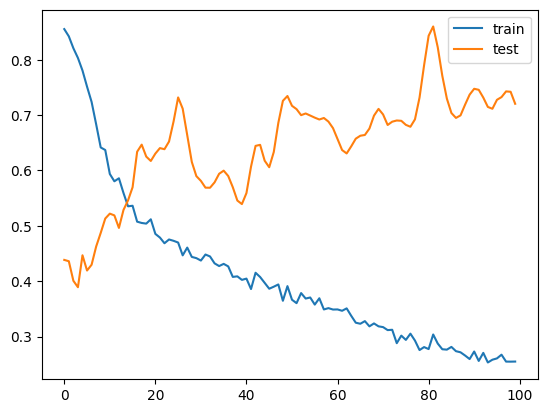

In [59]:
model_2 = Sequential()
model_2.add(LSTM(128, activation='relu', input_shape=(n_steps, 14)))
model_2.add(Dropout(0.2))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1))
model_2.compile(optimizer=tf.keras.optimizers.Adam(beta_1 = 0.999), loss='mse')


history2 = model_2.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)

plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

In [60]:
yhat2 = model_2.predict(X_test, verbose=0)

yhat2 = scaler.inverse_transform(yhat2)

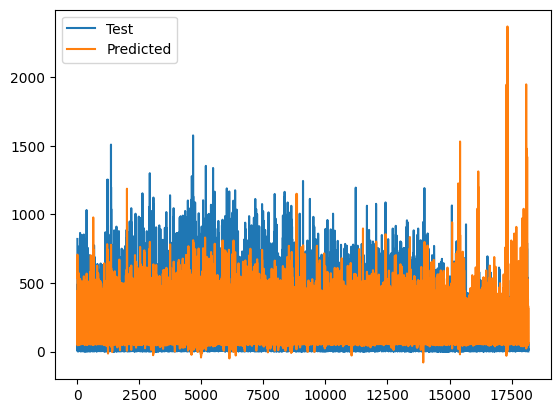

In [61]:
plt.plot(y_test_denorm, label='Test')
plt.plot(yhat2, label='Predicted')
plt.legend()

In [62]:
yhat2_train = model_2.predict(X_train, verbose=0)
yhat2_train = scaler.inverse_transform(yhat2_train)
rmse2 = sqrt(mean_squared_error(y_train_denorm, yhat2_train))
print('Train RMSE: %.3f' % rmse2)

rmse2_test = sqrt(mean_squared_error(y_test_denorm, yhat2))
print('Test RMSE: %.3f' % rmse2_test)


Train RMSE: 94.829
Test RMSE: 204.619


Epoch 1/100
57/57 [==============================] - 5s 37ms/step - loss: 0.8567 - val_loss: 0.5640
Epoch 2/100
57/57 [==============================] - 0s 8ms/step - loss: 0.8259 - val_loss: 0.5172
Epoch 3/100
57/57 [==============================] - 0s 8ms/step - loss: 0.7906 - val_loss: 0.4852
Epoch 4/100
57/57 [==============================] - 1s 13ms/step - loss: 0.7450 - val_loss: 0.4495
Epoch 5/100
57/57 [==============================] - 0s 8ms/step - loss: 0.7157 - val_loss: 0.4192
Epoch 6/100
57/57 [==============================] - 0s 8ms/step - loss: 0.7231 - val_loss: 0.4163
Epoch 7/100
57/57 [==============================] - 1s 14ms/step - loss: 0.6912 - val_loss: 0.4194
Epoch 8/100
57/57 [==============================] - 1s 11ms/step - loss: 0.6646 - val_loss: 0.4280
Epoch 9/100
57/57 [==============================] - 0s 8ms/step - loss: 0.6424 - val_loss: 0.4452
Epoch 10/100
57/57 [==============================] - 0s 9ms/step - loss: 0.6077 - val_loss: 0.4712
Epoch

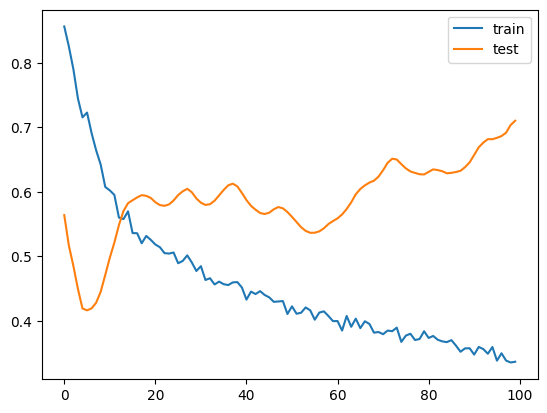

In [63]:
model_3 = Sequential()
model_3.add(LSTM(32, activation='relu', input_shape=(n_steps, 14)))
model_3.add(Dropout(0.2))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(1))

model_3.compile(optimizer=tf.keras.optimizers.Adam(beta_1 = 0.999), loss='mse')

history3 = model_3.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()
plt.show()

In [64]:
yhat3 = model_3.predict(X_test, verbose=0)
# denormalize yhat3
yhat3 = scaler.inverse_transform(yhat3) 

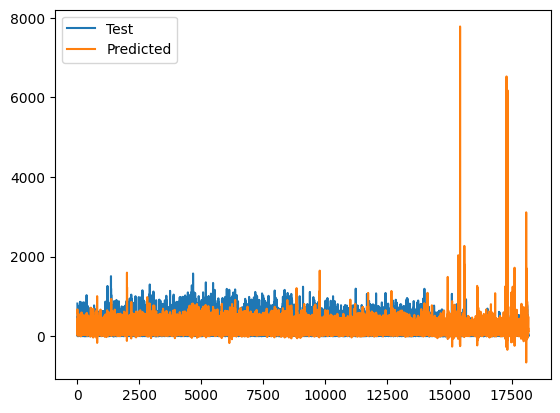

In [65]:
plt.plot(y_test_denorm, label='Test')
plt.plot(yhat3, label='Predicted')
plt.legend()

In [66]:
yhat_train3 = model_3.predict(X_train, verbose=0)
yhat_train3 = scaler.inverse_transform(yhat_train3)
rmse3 = sqrt(mean_squared_error(y_train_denorm, yhat_train3, squared=False))
print('Train RMSE: %.3f' % rmse3)

rmse3_test = sqrt(mean_squared_error(y_test_denorm, yhat3, squared=False))
print('Test RMSE: %.3f' % rmse3_test)

Train RMSE: 10.981
Test RMSE: 14.898


In [72]:
#save model_3 in models folder with pickle
import pickle
filename = '../models/traffic_pred_mdl_v2.pkl'
pickle.dump(model_3, open(filename, 'wb'))

Epoch 1/100
57/57 [==============================] - 2s 8ms/step - loss: 0.8481 - val_loss: 0.3480
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.7053 - val_loss: 0.5385
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 0.6384 - val_loss: 0.5515
Epoch 4/100
57/57 [==============================] - 1s 9ms/step - loss: 0.5539 - val_loss: 0.7951
Epoch 5/100
57/57 [==============================] - 0s 7ms/step - loss: 0.5400 - val_loss: 0.8101
Epoch 6/100
57/57 [==============================] - 1s 10ms/step - loss: 0.5083 - val_loss: 0.9536
Epoch 7/100
57/57 [==============================] - 0s 8ms/step - loss: 0.4907 - val_loss: 1.1185
Epoch 8/100
57/57 [==============================] - 0s 8ms/step - loss: 0.4702 - val_loss: 1.0997
Epoch 9/100
57/57 [==============================] - 1s 9ms/step - loss: 0.4674 - val_loss: 1.0587
Epoch 10/100
57/57 [==============================] - 0s 5ms/step - loss: 0.4486 - val_loss: 1.0526
Epoch 11

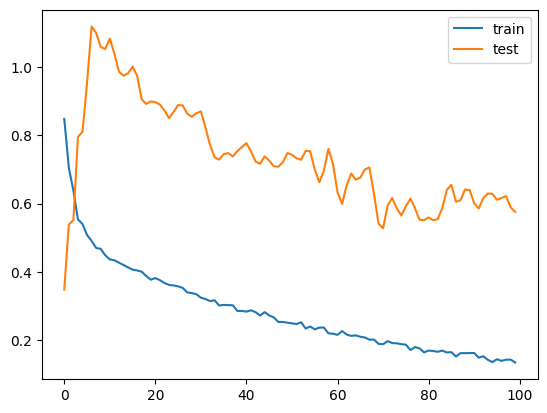

In [68]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model_5 = Sequential()
model_5.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, 14)))
model_5.add(MaxPooling1D(pool_size=2))
model_5.add(Flatten())
model_5.add(Dense(32, activation='relu'))
model_5.add(Dropout(0.2))
model_5.add(Dense(8, activation='relu'))
model_5.add(Dense(1))
model_5.compile(optimizer=tf.keras.optimizers.Adam(beta_1 = 0.999), loss='mse')

history5 = model_5.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)

plt.plot(history5.history['loss'], label='train')
plt.plot(history5.history['val_loss'], label='test')
plt.legend()
plt.show()


In [69]:
yhat5 = model_5.predict(X_test, verbose=0)
yhat5 = scaler.inverse_transform(yhat5)


In [70]:
yhat_train5 = model_5.predict(X_train, verbose=0)
yhat_train5 = scaler.inverse_transform(yhat_train5)
rmse_train5 = sqrt(mean_squared_error(y_train_denorm, yhat_train5))
print('Train RMSE: %.3f' % rmse_train5)

yhat5 = model_5.predict(X_test, verbose=0)
rmse5 = sqrt(mean_squared_error(y_test_denorm, yhat5))
print('Test RMSE: %.3f' % rmse5)


Train RMSE: 72.764
Test RMSE: 336.055


## Conclusions:

 - Given the high amount of variance between train and test predictions and the utilization of a very high beta 1 momentum parameter with little to no gain in performance in testing data, we can conclude that for this application we would need more data to make more accurate predictions. Nonetheless, the saved model for version 2.0 is pretty reliable at approximating most occurences, with the exeption of a few outlier predictions. These could most likely be solved by gathering more training data.
 Therefore, one of the next steps for this project would be gathering more data from the weather api, which is the limitant for this project.

 - Poor model performance can also be a factor of poor overall correlation between features and target variable, also making the gathering of more information the prime pick for our next steps.

 - Next possible step could also be the investigation of the outlier predictions to give further insight to the overall flaws of the model.

 - Hypotheses for next versions: 
    1. Bigger Network models will tend to have higher performance than seen in this experiment.
    2. LSTM models will come closer to state-of-the-art models that are in production nowadays.